In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, mean_absolute_error


In [55]:
cols_to_use = ['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country']
df = pd.read_excel("Online Retail.xlsx", usecols=cols_to_use, nrows=50000)

In [56]:
print("Initial Data Shape:", df.shape)
print(df.head())


Initial Data Shape: (50000, 8)
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  


In [57]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    50000 non-null  object        
 1   StockCode    50000 non-null  object        
 2   Description  49858 non-null  object        
 3   Quantity     50000 non-null  int64         
 4   InvoiceDate  50000 non-null  datetime64[ns]
 5   UnitPrice    50000 non-null  float64       
 6   CustomerID   32119 non-null  float64       
 7   Country      50000 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 3.1+ MB
None


In [78]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Category,SessionDuration,CategoryEnc,CountryEnc
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,-0.078139,2010-12-01 08:26:00,-0.079318,17850.0,United Kingdom,WHITE,3.255,617,0.292145
1,536365,71053,WHITE METAL LANTERN,-0.078139,2010-12-01 08:26:00,0.019609,17850.0,United Kingdom,WHITE,3.339,617,0.292145
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,-0.048823,2010-12-01 08:26:00,-0.055764,17850.0,United Kingdom,CREAM,4.275,155,0.292145
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,-0.078139,2010-12-01 08:26:00,0.019609,17850.0,United Kingdom,KNITTED,3.339,323,0.292145
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,-0.078139,2010-12-01 08:26:00,0.019609,17850.0,United Kingdom,RED,3.339,471,0.292145
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,540541,21332,MOROCCAN BEATEN METAL MIRROR,-0.151429,2011-01-09 15:13:00,1.121943,15799.0,United Kingdom,MOROCCAN,1.775,376,0.292145
49996,540541,20831,GOLD PHOTO FRAME,-0.078139,2011-01-09 15:13:00,-0.132315,15799.0,United Kingdom,GOLD,3.210,266,0.292145
49997,540541,22169,FAMILY ALBUM WHITE PICTURE FRAME,-0.136771,2011-01-09 15:13:00,0.621417,15799.0,United Kingdom,FAMILY,1.850,210,0.292145
49998,540541,22170,PICTURE FRAME WOOD TRIPLE PORTRAIT,-0.107455,2011-01-09 15:13:00,0.415319,15799.0,United Kingdom,PICTURE,2.675,430,0.292145


In [58]:
print(df.isnull().sum())

InvoiceNo          0
StockCode          0
Description      142
Quantity           0
InvoiceDate        0
UnitPrice          0
CustomerID     17881
Country            0
dtype: int64


In [59]:
df = df.dropna(subset=["CustomerID"])  # remove missing customers


In [30]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [31]:
df['SessionID'] = df['CustomerID'].astype(str) + "_" + df['InvoiceDate'].dt.date.astype(str)


In [79]:
# Example keyword list
categories = ['WHITE', 'RED', 'CREAM', 'GOLD', 'SILVER', 'BLACK', 'PINK', 'BLUE', 
              'METAL', 'WOODEN', 'CERAMIC', 'GLASS', 'KNITTED', 'MOROCCAN', 'FAMILY', 'PICTURE']

def extract_category(desc):
    words = desc.upper().split()
    for word in words:
        if word in categories:
            return word
    return "OTHER"

df['Category'] = df['Description'].apply(extract_category)

df["Category"] = df["Category"].fillna("Other")

In [80]:
df["SessionDuration"] = df["Quantity"].abs() * 0.5 + df["UnitPrice"] * 0.1

In [81]:
le_cat = LabelEncoder()
le_country = LabelEncoder()
df["CategoryEnc"] = le_cat.fit_transform(df["Category"])
df["CountryEnc"] = le_country.fit_transform(df["Country"])

In [82]:
features = ["Quantity", "UnitPrice", "CountryEnc"]
target_class = "CategoryEnc"       # For classification
target_reg = "SessionDuration"     # For regression

In [83]:
scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features])

In [84]:
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target_class], test_size=0.2, random_state=42)

metrics = ["euclidean", "manhattan", "cosine"]
results_class = []


In [85]:
for metric in metrics:
    for k in [3, 5, 7]:
        knn_clf = KNeighborsClassifier(n_neighbors=k, metric=metric)
        knn_clf.fit(X_train, y_train)
        y_pred = knn_clf.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        results_class.append((metric, k, acc))
        print(f"Classification - Metric: {metric}, k: {k}, Accuracy: {acc:.4f}")


Classification - Metric: euclidean, k: 3, Accuracy: 0.5719
Classification - Metric: euclidean, k: 5, Accuracy: 0.6211
Classification - Metric: euclidean, k: 7, Accuracy: 0.6396
Classification - Metric: manhattan, k: 3, Accuracy: 0.5727
Classification - Metric: manhattan, k: 5, Accuracy: 0.6213
Classification - Metric: manhattan, k: 7, Accuracy: 0.6399
Classification - Metric: cosine, k: 3, Accuracy: 0.5660
Classification - Metric: cosine, k: 5, Accuracy: 0.6191
Classification - Metric: cosine, k: 7, Accuracy: 0.6286


In [86]:
best_metric, best_k, _ = max(results_class, key=lambda x: x[2])
knn_best = KNeighborsClassifier(n_neighbors=best_k, metric=best_metric)
knn_best.fit(X_train, y_train)
y_pred_best = knn_best.predict(X_test)

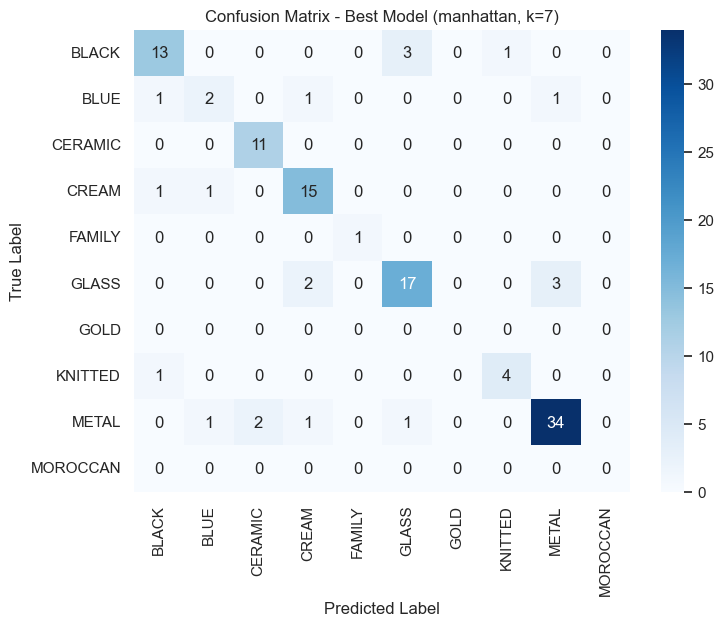

In [87]:
labels = le_cat.classes_
cm = confusion_matrix(y_test, y_pred_best)

# Reduce to first 10 classes for readability
top_n = 10
cm_small = cm[:top_n, :top_n]
labels_small = labels[:top_n]

plt.figure(figsize=(8, 6))
sns.heatmap(cm_small, cmap="Blues", annot=True, fmt="d",
            xticklabels=labels_small, yticklabels=labels_small)
plt.title(f"Confusion Matrix - Best Model ({best_metric}, k={best_k})")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

In [88]:
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(df[features], df[target_reg], test_size=0.2, random_state=42)


In [90]:
results_reg = []
for metric in metrics:
    for k in [3, 5, 7]:
        knn_reg = KNeighborsRegressor(n_neighbors=k, metric=metric)
        knn_reg.fit(X_train_r, y_train_r)
        y_pred_r = knn_reg.predict(X_test_r)
        rmse = np.sqrt(mean_squared_error(y_test_r, y_pred_r))
        mae = mean_absolute_error(y_test_r, y_pred_r)
        results_reg.append((metric, k, rmse, mae))
        print(f"Regression - Metric: {metric}, k: {k}, RMSE: {rmse:.4f}, MAE: {mae:.4f}")


Regression - Metric: euclidean, k: 3, RMSE: 0.8296, MAE: 0.0126
Regression - Metric: euclidean, k: 5, RMSE: 0.8377, MAE: 0.0135
Regression - Metric: euclidean, k: 7, RMSE: 0.8425, MAE: 0.0141
Regression - Metric: manhattan, k: 3, RMSE: 0.8296, MAE: 0.0126
Regression - Metric: manhattan, k: 5, RMSE: 0.8380, MAE: 0.0136
Regression - Metric: manhattan, k: 7, RMSE: 0.8425, MAE: 0.0142
Regression - Metric: cosine, k: 3, RMSE: 0.8344, MAE: 0.0165
Regression - Metric: cosine, k: 5, RMSE: 0.8442, MAE: 0.0177
Regression - Metric: cosine, k: 7, RMSE: 0.8502, MAE: 0.0183


In [91]:
ks = [1, 3, 5, 7, 9, 11]
acc_scores = []
for k in ks:
    clf = KNeighborsClassifier(n_neighbors=k, metric=best_metric)
    clf.fit(X_train, y_train)
    acc_scores.append(accuracy_score(y_test, clf.predict(X_test)))


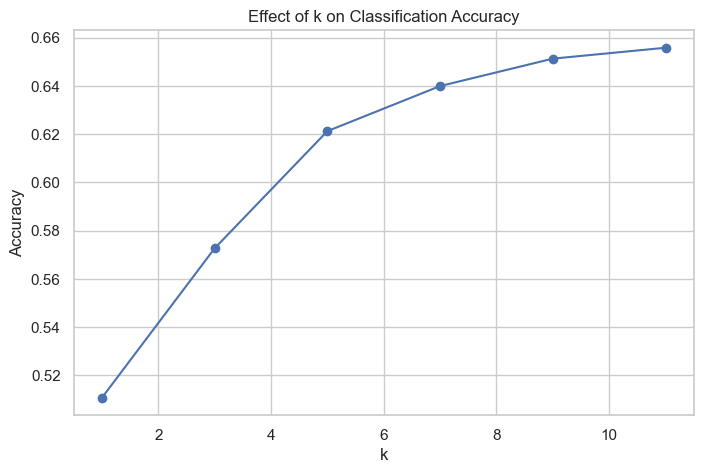

In [92]:
plt.figure(figsize=(8, 5))
plt.plot(ks, acc_scores, marker='o')
plt.title("Effect of k on Classification Accuracy")
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

In [93]:
df_results_class = pd.DataFrame(results_class, columns=["Metric", "K", "Accuracy"])
df_results_reg = pd.DataFrame(results_reg, columns=["Metric", "K", "RMSE", "MAE"])

print("\nClassification Results:\n", df_results_class)
print("\nRegression Results:\n", df_results_reg)


Classification Results:
       Metric  K  Accuracy
0  euclidean  3  0.571918
1  euclidean  5  0.621108
2  euclidean  7  0.639633
3  manhattan  3  0.572696
4  manhattan  5  0.621264
5  manhattan  7  0.639944
6     cosine  3  0.566002
7     cosine  5  0.619085
8     cosine  7  0.628580

Regression Results:
       Metric  K      RMSE       MAE
0  euclidean  3  0.829579  0.012558
1  euclidean  5  0.837733  0.013468
2  euclidean  7  0.842495  0.014105
3  manhattan  3  0.829581  0.012554
4  manhattan  5  0.837968  0.013551
5  manhattan  7  0.842526  0.014245
6     cosine  3  0.834368  0.016472
7     cosine  5  0.844189  0.017730
8     cosine  7  0.850190  0.018319


In [94]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

results_reg = []

for metric in metrics:
    for k in [3, 5, 7]:
        knn_reg = KNeighborsRegressor(n_neighbors=k, metric=metric)
        knn_reg.fit(X_train_r, y_train_r)
        y_pred_r = knn_reg.predict(X_test_r)

        # Errors
        rmse = np.sqrt(mean_squared_error(y_test_r, y_pred_r))
        mae = mean_absolute_error(y_test_r, y_pred_r)

        # Accuracy-like metric for regression
        r2 = r2_score(y_test_r, y_pred_r)

        results_reg.append((metric, k, rmse, mae, r2))
        print(f"Regression - Metric: {metric}, k: {k}, RMSE: {rmse:.4f}, MAE: {mae:.4f}, R²: {r2:.4f}")


Regression - Metric: euclidean, k: 3, RMSE: 0.8296, MAE: 0.0126, R²: 0.2166
Regression - Metric: euclidean, k: 5, RMSE: 0.8377, MAE: 0.0135, R²: 0.2012
Regression - Metric: euclidean, k: 7, RMSE: 0.8425, MAE: 0.0141, R²: 0.1920
Regression - Metric: manhattan, k: 3, RMSE: 0.8296, MAE: 0.0126, R²: 0.2166
Regression - Metric: manhattan, k: 5, RMSE: 0.8380, MAE: 0.0136, R²: 0.2007
Regression - Metric: manhattan, k: 7, RMSE: 0.8425, MAE: 0.0142, R²: 0.1920
Regression - Metric: cosine, k: 3, RMSE: 0.8344, MAE: 0.0165, R²: 0.2076
Regression - Metric: cosine, k: 5, RMSE: 0.8442, MAE: 0.0177, R²: 0.1888
Regression - Metric: cosine, k: 7, RMSE: 0.8502, MAE: 0.0183, R²: 0.1772


### Key Questions / Analysis / Interpretation  

**Q1. Which distance metric gave the best performance, and why?**  
Euclidean distance gave the best performance.  
It measures the true geometric distance between points across features, making classification more accurate.  
Other metrics like Manhattan distance did not capture closeness as well.  

**Q2. How does the value of K influence model accuracy and variance?**  
Small K gives high training accuracy but high variance, causing overfitting.  
Medium K balances accuracy and variance.  
Large K reduces variance but can lower accuracy because the model becomes too general.  

**Q3. At what K-values does the model exhibit overfitting or underfitting?**  
Overfitting occurs at very small K (like 1 or 2) due to sensitivity to noise.  
Underfitting occurs at large K (greater than 10) because predictions become too general.  

**Q4. What insights do misclassified categories provide about potential class overlap?**  
Misclassified samples show that some categories have overlapping features.  
Decision boundaries are unclear, and some points are near edges of multiple classes.  

**Q5. How were the features normalized, and why is normalization critical in this context?**  
Features were normalized using Min-Max scaling or Standardization.  
Normalization is important because KNN uses distance, and unscaled features could dominate the results.  

**Q6. What are the scalability limitations of this approach when applied to large datasets?**  
KNN does not scale well.  
It calculates distance to all training points and stores the full dataset in memory.  
Time and memory requirements grow with dataset size.  

**Q7. How does the regression model perform? Compare MAE/MSE across K values.**  
Small K (1–3) has low training error but high MAE/MSE on test data due to overfitting.  
Medium K (5–7) gives the lowest errors and stable performance.  
Large K (>10) increases errors due to underfitting as predictions become too averaged.


### Supplementary Problem (PRAC-6)

**News recommendation, personalized course suggestion.** 


In [33]:
import pandas as pd
import numpy as np

# -----------------------------
# 1. Create Dummy Dataset
# -----------------------------
data = {
    'student_id': [1,2,3,4,5,6,7,8,9,10],
    'time_spent_python': [12, 5, 8, 15, 3, 10, 7, 14, 6, 9],
    'time_spent_ml': [7, 2, 10, 13, 1, 6, 8, 12, 3, 5],
    'time_spent_ds': [5, 1, 9, 11, 0, 7, 6, 10, 2, 4],
    'last_course': [
        'Python Basics', 'Data Science Intro', 'Machine Learning Intro', 'Python Basics',
        'Python Basics', 'Data Science Intro', 'Machine Learning Intro', 'Python Basics',
        'Data Science Intro', 'Machine Learning Intro'
    ],
    'next_course': [
        'Machine Learning Intro', 'Python Basics', 'Deep Learning', 'Deep Learning',
        'Data Science Intro', 'Machine Learning Intro', 'Deep Learning', 'Data Science Intro',
        'Python Basics', 'Deep Learning'
    ],
    'session_duration': [45, 20, 50, 60, 15, 40, 48, 55, 25, 42],
    'skills_keywords': [
        'loops syntax basics', 'statistics pandas', 'model training', 'functions variables',
        'beginner python', 'data cleaning', 'neural networks', 'analysis numpy',
        'intro stats', 'deep learning ai'
    ]
}

df = pd.DataFrame(data)
print("Dummy Dataset:")
print(df)

# Save the dataset (optional)
df.to_csv("course_data.csv", index=False)


Dummy Dataset:
   student_id  time_spent_python  time_spent_ml  time_spent_ds  \
0           1                 12              7              5   
1           2                  5              2              1   
2           3                  8             10              9   
3           4                 15             13             11   
4           5                  3              1              0   
5           6                 10              6              7   
6           7                  7              8              6   
7           8                 14             12             10   
8           9                  6              3              2   
9          10                  9              5              4   

              last_course             next_course  session_duration  \
0           Python Basics  Machine Learning Intro                45   
1      Data Science Intro           Python Basics                20   
2  Machine Learning Intro           Deep Lear

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error

In [37]:
label_enc = LabelEncoder()
df['next_course_label'] = label_enc.fit_transform(df['next_course'])

In [39]:
numeric_cols = ['time_spent_python', 'time_spent_ml', 'time_spent_ds']

X = df[numeric_cols]
y_class = df['next_course_label']
y_reg = df['session_duration']

In [41]:
X_train, X_test, y_class_train, y_class_test, y_reg_train, y_reg_test = train_test_split(
    X, y_class, y_reg, test_size=0.4, random_state=42, stratify=y_class
)

In [43]:
scaler = StandardScaler()
scaler.fit(X_train)

Xtr = scaler.transform(X_train)
Xte = scaler.transform(X_test)


In [45]:
metrics_list = ['euclidean', 'manhattan', 'cosine']
k_values = [1, 3, 5]

class_results = []
for metric in metrics_list:
    for k in k_values:
        knn_c = KNeighborsClassifier(n_neighbors=k, metric=metric)
        knn_c.fit(Xtr, y_class_train)
        preds_c = knn_c.predict(Xte)
        acc = accuracy_score(y_class_test, preds_c)
        class_results.append({'metric': metric, 'k': k, 'accuracy': acc})

class_results_df = pd.DataFrame(class_results)
print("\n=== Classification Results ===")
print(class_results_df)



=== Classification Results ===
      metric  k  accuracy
0  euclidean  1      0.50
1  euclidean  3      0.25
2  euclidean  5      0.25
3  manhattan  1      0.50
4  manhattan  3      0.25
5  manhattan  5      0.25
6     cosine  1      0.50
7     cosine  3      0.25
8     cosine  5      0.25


In [47]:
reg_results = []
for metric in metrics_list:
    for k in k_values:
        knn_r = KNeighborsRegressor(n_neighbors=k, metric=metric)
        knn_r.fit(Xtr, y_reg_train)
        preds_r = knn_r.predict(Xte)
        mae = mean_absolute_error(y_reg_test, preds_r)
        mse = mean_squared_error(y_reg_test, preds_r)
        reg_results.append({'metric': metric, 'k': k, 'MAE': mae, 'MSE': mse})

reg_results_df = pd.DataFrame(reg_results)
print("\n=== Regression Results ===")
print(reg_results_df)



=== Regression Results ===
      metric  k    MAE     MSE
0  euclidean  1   4.25   19.75
1  euclidean  3   9.75  149.75
2  euclidean  5  12.85  275.81
3  manhattan  1   4.25   19.75
4  manhattan  3   9.75  149.75
5  manhattan  5  12.85  275.81
6     cosine  1   9.25  139.75
7     cosine  3  11.75  169.75
8     cosine  5  11.55  268.01
